In [2]:
import pandas as pd
import  numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Initial data load and display

In [4]:
loan_data = pd.read_csv("loan_Data.csv")
features = loan_data.iloc[:,0:13]
label = loan_data.iloc[:,-1]

In [3]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Feature transform "purpose"

In [4]:
features_t = pd.get_dummies(features,columns=["purpose"],drop_first=True)
features_t.head()


,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,1,0,0,0,0,0


In [5]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


## Check missing values

In [6]:
loan_data.isna().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## EDA - Checking relation of interest rate, credit score and default

<Figure size 792x504 with 0 Axes>

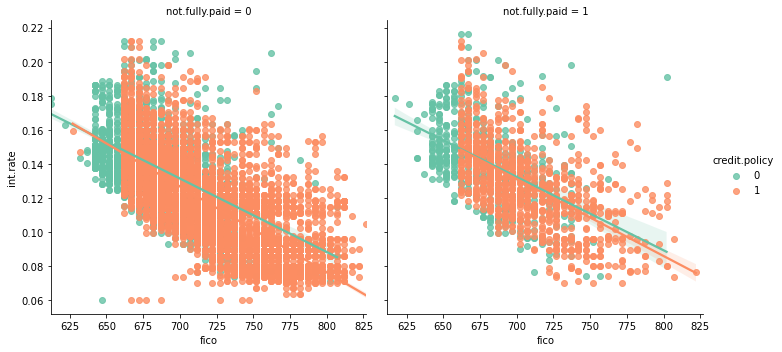

In [5]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan_data,hue='credit.policy',
           col='not.fully.paid',palette='Set2')

## Feature selection

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [9]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(features.iloc[:,2:],label)
featscores = pd.DataFrame(fit.scores_)
featcolumns = pd.DataFrame(features.iloc[:,2:].columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([featcolumns,featscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                Specs         Score
6           revol.bal  1.860498e+06
5   days.with.cr.line  1.119078e+04
1         installment  3.211572e+03
7          revol.util  1.160848e+03
8      inq.last.6mths  6.564686e+02
4                fico  4.351062e+02
3                 dti  5.025229e+01
10            pub.rec  2.505498e+01
0            int.rate  1.432816e+00
9         delinq.2yrs  1.376617e+00


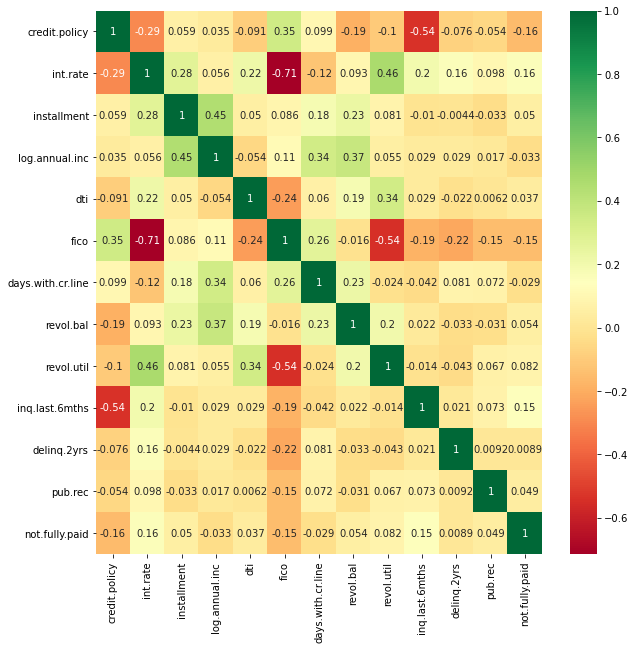

In [10]:
corrmat = loan_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(loan_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#No real conclusion on irrelevant features. So selecting all.

## Check imbalanced data

Positive examples = 1533
Negative examples = 8045
Proportion of positive to negative examples = 19.06%


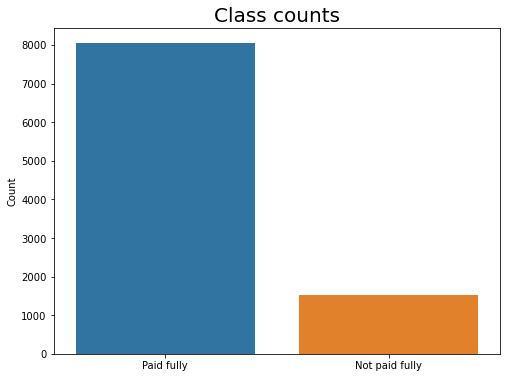

In [11]:
pos = loan_data[loan_data["not.fully.paid"] == 1].shape[0]
neg = loan_data[loan_data["not.fully.paid"] == 0].shape[0]
print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")
print(f"Proportion of positive to negative examples = {(pos / neg) * 100:.2f}%")
plt.figure(figsize=(8, 6))
sns.countplot(loan_data["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", y=1, fontdict={"fontsize": 20});

## Adjusting the imbalance by using over sampling.

In [12]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(features_t,label, test_size=0.2, random_state=1)

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

In [22]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

After OverSampling, the shape of train_X: (12904, 18)
After OverSampling, the shape of train_y: (12904,) 



## Modelling


In [15]:
#Initialize Sequential model
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(18,))) 

#Add Dense Layer  1
model.add(tf.keras.layers.Dense(80, activation='relu'))

#Add Dense Layer  2
model.add(tf.keras.layers.Dense(140, activation='tanh'))

#Add Dense Layer  3
model.add(tf.keras.layers.Dense(250, activation='relu'))

#Add Dense Layer which provides 1 Outputs after applying sigmoid - keras declare weights and bias automatically
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

#Comile the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
model.fit(X_train_res, y_train_res,
          validation_data=(X_test, y_test), 
          epochs=40,
          batch_size=40)

Epoch 1/40
323/323 [==============================] - 1s 2ms/step - loss: 5.9605e-08 - accuracy: 0.5000 - val_loss: 2.0096e-08 - val_accuracy: 0.1686
Epoch 2/40
323/323 [==============================] - 0s 1ms/step - loss: 5.9605e-08 - accuracy: 0.5000 - val_loss: 2.0096e-08 - val_accuracy: 0.1686
Epoch 3/40
323/323 [==============================] - 0s 1ms/step - loss: 5.9605e-08 - accuracy: 0.5000 - val_loss: 2.0096e-08 - val_accuracy: 0.1686
Epoch 4/40
323/323 [==============================] - 0s 1ms/step - loss: 5.9605e-08 - accuracy: 0.5000 - val_loss: 2.0096e-08 - val_accuracy: 0.1686
Epoch 5/40
323/323 [==============================] - 0s 1ms/step - loss: 5.9605e-08 - accuracy: 0.5000 - val_loss: 2.0096e-08 - val_accuracy: 0.1686
Epoch 6/40
323/323 [==============================] - 0s 1ms/step - loss: 5.9605e-08 - accuracy: 0.5000 - val_loss: 2.0096e-08 - val_accuracy: 0.1686
Epoch 7/40
323/323 [==============================] - 0s 1ms/step - loss: 5.9605e-08 - accuracy: 0.5

In [20]:
pred = lambda inp :[0 if out <= 0.5 else 1 for out in model.predict(inp)]

In [21]:
pred(X_test)

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
